In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## detecting and cropping faces

In [3]:
done = True
done = False

from gaze import init, Data
args = init(batch_size=8, no_cuda=True, verbose=1)
d = Data(args)

Found 1358 sample images;  1087  to train 271 to test


In [ ]:
import os
import glob
datapath_faces = 'dataset_faces'
datapath = 'dataset'

In [ ]:
!rm -fr {datapath_faces}

In [4]:
if True:
    n_show = 10
    for target in d.classes:
        for filename in glob.glob(os.path.join(datapath, target) + '/*.png')[-n_show:]:
            print(filename)

dataset/blink/2018-09-12_Laurent_035.png
dataset/blink/2018-09-12_Laurent_223.png
dataset/blink/2018-09-12_Laurent_237.png
dataset/blink/2018-09-12_Laurent_222.png
dataset/blink/2018-09-14_Laurent_121.png
dataset/blink/2018-09-04_Laurent_180.png
dataset/blink/2018-10-03_Laurent_116.png
dataset/blink/2018-09-12_Laurent_020.png
dataset/blink/2018-09-05_Laurent_085.png
dataset/blink/2018-09-14_Laurent_069.png
dataset/center/2018-09-05_Laurent_091.png
dataset/center/2018-09-04_Laurent_16.png
dataset/center/2018-09-12_Laurent_140.png
dataset/center/2018-09-14_Laurent_243.png
dataset/center/2018-09-12_Laurent_168.png
dataset/center/2018-09-12_Laurent_183.png
dataset/center/2018-09-04_Laurent_221.png
dataset/center/2018-09-04_Laurent_235.png
dataset/center/2018-10-03_Laurent_089.png
dataset/center/2018-10-03_Laurent_076.png
dataset/left/2018-09-12_Laurent_236.png
dataset/left/2018-09-05_Laurent_091.png
dataset/left/2018-09-12_Laurent_008.png
dataset/left/2018-09-05_Laurent_052.png
dataset/lef

In [5]:
import imageio
if not done:
    import time
    from gaze import FaceExtractor
    FE = FaceExtractor()
    timings = []
    for target in d.classes:
        for filename in glob.glob(os.path.join(datapath, target) + '/*.png'):
            frame = imageio.imread(filename)
            t0 = time.time()
            face = FE.face_extractor(frame)
            t1 = time.time()
            timings.append(t1-t0)
            if False:
                print("Number of faces detected: {}".format(len(dets)))
                for i, d in enumerate(dets):
                    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
                        i, d.left(), d.top(), d.right(), d.bottom()))

            if False:
                # Create figure and axes
                fig, ax = plt.subplots(figsize=(15, 8))

                # Display the image
                ax.imshow(frame)

                # Create a Rectangle patch
                rect = patches.Rectangle((d.bottom(), d.left()), d.right()-d.left(), d.top()-d.bottom(), linewidth=1, edgecolor='r', facecolor='none')

                # Add the patch to the Axes
                ax.add_patch(rect)
                plt.show()    
            if False:
                # Create figure and axes
                fig, ax = plt.subplots(figsize=(15, 8))

                # Display the cropped image
                ax.imshow(face)

                plt.show()                

            filename_face = filename.replace(datapath, datapath_faces)
            imageio.imwrite(filename_face, face) 


In [6]:
if not done:
    timings = np.array(timings) * 1000
    print('timings in ms =', timings.mean(), '+/-', timings.std()) 

In [7]:
if not done:
    fig, ax = plt.subplots(figsize=((8, 5)))
    n, bins, patches = ax.hist(timings, bins=np.linspace(100, 200, 100), alpha=.4)
    ax.vlines(np.median(timings), 0, n.max(), 'g', linestyles='dashed', label='median = %.3f ms' % np.median(timings))
    #ax.vlines(25, 0, n.max(), 'r', linestyles='dashed', label='chance level')
    #ax.vlines(100, 0, n.max(), 'k', label='max')
    ax.set_xlabel('Timings (ms)')
    ax.set_ylabel('Smarts')
    ax.legend(loc='best')
    if False:
        plt.show() 
    else:
        plt.savefig('dlib_timings.png')

## training the model on the cropped faces

In [8]:
from gaze import init
#epochs = 400
#args = init(verbose=0, epochs=epochs)
args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'dataset_folder': 'dataset', 'dataset_faces_folder': 'dataset_faces', 'batch_size': 8, 'test_batch_size': 1, 'size_test_set': 0.2, 'epochs': 60, 'do_adam': False, 'lr': 0.025, 'momentum': 0.05, 'no_cuda': False, 'num_processes': 1, 'seed': 42, 'log_interval': 0, 'fullsize': 75, 'crop': 64, 'size': 64, 'mean': 0.6, 'std': 0.3, 'conv1_dim': 9, 'conv1_kernel_size': 18, 'conv2_dim': 36, 'conv2_kernel_size': 14, 'bn1_momentum': 0.5, 'bn2_momentum': 0.5, 'stride1': 2, 'stride2': 4, 'N_cv': 8, 'dimension': 30, 'verbose': 1}


In [9]:
from gaze import init
epochs = 400
args = init(verbose=0, epochs=epochs)
path = '_Regard_400.pt'

In [10]:
!ls -l {path}
#!rm {path}

-rw-r--r--  1 laurentperrinet  staff  310063 Oct  9 13:49 _Regard_400.pt


In [ ]:
from gaze import ML
ml = ML(args)
ml.train(path=path)

Loading file _Regard_400.pt


## testing the model

In [ ]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))

Accuracy=93.4%


Showing the one which are wrong:

## showing the images which are wrongly classified

For  dataset/blink/2018-09-05_Laurent_232.png , Pred = center True = blink , P= ['0.047', '0.953', '0.000', '0.000']


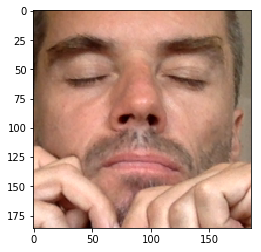

For  dataset/center/2018-09-05_Laurent_073.png , Pred = right True = center , P= ['0.009', '0.083', '0.000', '0.908']


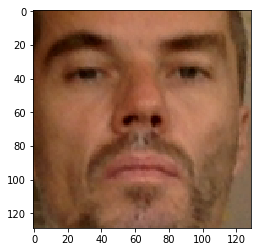

For  dataset/center/2018-09-05_Laurent_014.png , Pred = left True = center , P= ['0.000', '0.026', '0.933', '0.041']


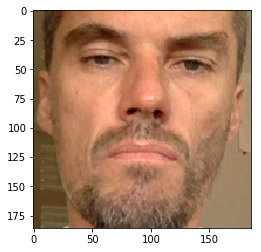

For  dataset/center/2018-09-05_Laurent_176.png , Pred = left True = center , P= ['0.001', '0.450', '0.549', '0.001']


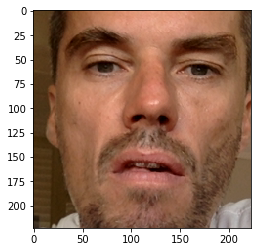

For  dataset/center/2018-09-05_Laurent_211.png , Pred = left True = center , P= ['0.000', '0.018', '0.978', '0.004']


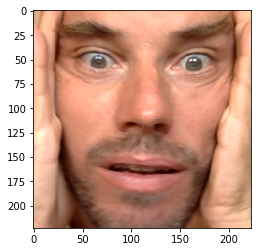

For  dataset/center/2018-09-05_Laurent_144.png , Pred = blink True = center , P= ['0.541', '0.425', '0.020', '0.014']


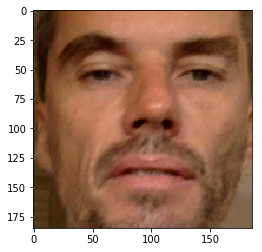

In [ ]:
import time
from gaze import FaceExtractor
FE = FaceExtractor()
timings = []
for target in d.classes:
    for filename in glob.glob(os.path.join(datapath, target) + '/*.png'):
        frame = imageio.imread(filename)
        img_face = FE.face_extractor(frame)
        pred = ml.classify(img_face, ml.dataset.test_transform)
        pred_label = ml.dataset.dataset.classes[pred.argmax()]
        if not pred_label == target:
            print('For ', filename, ', Pred =', pred_label, 'True =', target, ', P=', ['%.3f' % p for p in pred])
            plt.imshow(img_face)
            plt.show()

In [ ]:
!rm  dataset/center/2018-09-05_Laurent_073.png

# showing the trained weights

https://github.com/utkuozbulak/pytorch-cnn-visualizations/blob/master/README.md


In [ ]:
child = ml.model.children()

convolayer = [i for i in ml.model.children()][1]
convolayer

weights = convolayer.weight.data.clone()
weights.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torchvision import utils

def plotkernel(tensor, figname, ch=0, allkernels=False, nrow=3, padding=1):
    n, c, w, h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    fig, ax = plt.subplots( figsize=(nrow,rows) )
    ax.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.setp(ax, xticks=[], yticks=[])

    plt.savefig(figname)

for i in range(2):
    convolayer = [i for i in ml.model.children()][i]
    weights = convolayer.weight.data.clone()
    plotkernel(weights, figname = 'kernel_layer' + str(i) + '.png')

    